# Example of using R Markdown with jupyter notebook: An eye movement analysis of sentence reading 

## Abstract 
Mild reading difficulties are a pervasive symptom of aphasia, a language impairment common post stroke. In this study, we used eye tracking to investigate sentence reading by one person diagnosed with aphasia (PWA), compared to a neurologically healthy participant (NHI). Data were extracted from a larger project on sentence reading (published in Aphasiology online). The main aim of this study was to find out whether the eye movements of these two readers are influenced by linguistic factors of word frequency and contextual predictability. The two participants read sentences including target words that varied in word frequency and contextual predictability, and answered comprehension questions. We recorded gaze duration, total fixation duration, and first-pass regressions. Results demonstrated that the PWA had prolonged gaze and total fixation duratations and an increase of first-pass regressions compared to the NHI. Both readers were influenced by word frequency and predictability, but in different ways. Readers varied in gaze duration and first-pass regressions in particular, which may point to differences in the phase of lexical access.



## load libraries

In [227]:
library(gdata) # used
library(psych)
library(compute.es)
library(ggplot2) # used
library(multcomp)
library(pastecs) # used
library(ez)
library(Hmisc)
library(reshape) # used
library(gridExtra) #used

In [ ]:
#set working directory
setwd("~/code")

## We are going to load data of the two participants from the reading study.
### open database:

In [ ]:
rawdata=read.xls("EMdataexample.xlsx", 
                 na.strings = c("zero"),
                 colClasses = c(
                   'factor',  # RECORDING_SESSION_LABEL
                   'factor',  # GROUP
                   'factor',  # ID_OVERALL
                   'factor',  # ID
                   'factor',  # TRIAL_INDEX
                   'factor',  # trial_type
                   'factor',  # FREQUENCY
                   'factor',  # PREDICTABILITY
                   'factor',  # SENTENCE
                   'factor',  # ITEM
                   'factor',  # QUESTION
                   'factor',  # CRITICAL_WORD
                   'factor',  # ACCURACY   
                   'character', # SINGLE_FIXATION_DURATION
                   'character', # FIRST_FIXATION_DURATION
                   'character', # GAZE_DURATION
                   'character', # RIGHT_BOUNDED_DURATION
                   'character', # REGRESSION_PATH_DURATION
                   'character', # REREADING_DURATION
                   'character', # TOTAL_DURATION
                   'character',  # FIRST_PASS_REGRESSION
                   'character',  # FIRST_PASS_FIXATION
                   'factor',  # FIRST_PASS_MULTI_FIXATION 
                   'character' #trials.fixated
                 )
)



In [ ]:
# rawdata

In [ ]:
## Create a new dataframe for analysis

In [ ]:
data <-rawdata

## Explore the data

In [ ]:
str(data)
summary(data) 
head(data[, 1:10])
tail(data[, 1:10])
dim(data)

## Preparing variables we are interested in:
### Create variables as numeric
data$TOTAL_DURATION  <-as.numeric(data$TOTAL_DURATION)
data$GAZE_DURATION  <-as.numeric(data$GAZE_DURATION)
data$FIRST_PASS_REGRESSION <-as.numeric(data$FIRST_PASS_REGRESSION)


### Check whether the data frame inlcudes NAs
which(is.na(data$GAZE_DURATION))
which(is.na(data$TOTAL_DURATION))
which(is.na(data$FIRST_PASS_REGRESSION))
which(is.na(data$FIRST_PAST_FIXATION))

### Exclude the NAs
data <- data[(!is.na(data$GAZE_DURATION)),]
data <- data[(!is.na(data$TOTAL_DURATION)),]
data <- data[(!is.na(data$FIRST_PASS_REGRESSION)),]
data <- data[(!is.na(data$FIRST_PAST_FIXATION)),]

### Check whether it worked ok
which(is.na(data$GAZE_DURATION))
which(is.na(data$TOTAL_DURATION))
which(is.na(data$FIRST_PASS_REGRESSION))
which(is.na(data$FIRST_PAST_FIXATION))


### Rename GROUP as CASE - because this example dataset is restricted to the comparison of two cases
data <- rename(data, c(GROUP="CASE"))


In [224]:
# data

## Data analysis

There are four conditions (=TRIAL TYPES) in this dataset. Sentences with:
*    High frequency predictable words
*    High frequency unpredictable words
*    Low frequency predictable words
*    Low frequency unpredictable words

**Independent variables** are: word frequency, contextual predictability and case

**Dependent variables** are: gaze duration, total fixation duration, first-pass regression

### We start by getting some descriptive stats, comparing the four trial types: 

### Gaze duration as a measure of TRIAL TYPE and CASE
by(data$GAZE_DURATION, list(data$TRIAL_TYPE, data$CASE), stat.desc, basic= FALSE)


### Total fixation duration as a measure of TRIAL TYPE and CASE
by(data$TOTAL_DURATION, list(data$TRIAL_TYPE, data$CASE), stat.desc, basic= FALSE)


### First-pass regression as a measure of TRIAL TYPE and CASE
by(data$FIRST_PASS_REGRESSION, list(data$TRIAL_TYPE, data$CASE), stat.desc, basic= FALSE)

### Plotting
### Eye movements independent of trial types
### Gaze duration

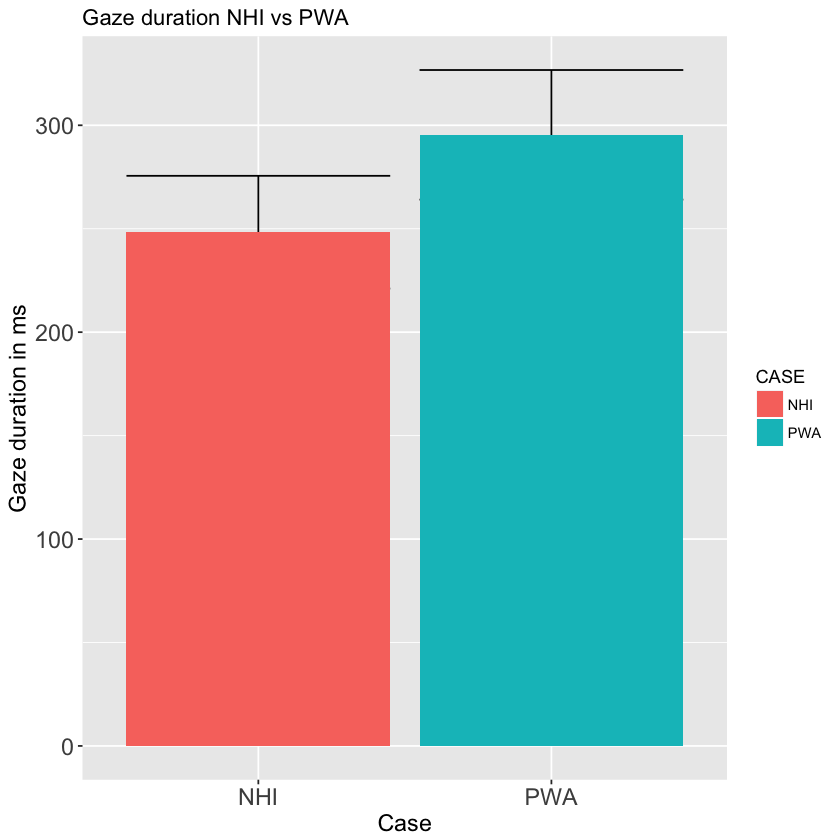

In [228]:
plot_gaze <- ggplot(data,aes(x=CASE, y=GAZE_DURATION, fill=CASE)) +  
  stat_summary(fun.data=mean_cl_normal,position=position_dodge(0.95),geom="errorbar") +
  stat_summary(fun.y=mean,position=position_dodge(width=0.95),geom="bar") +
    ylab("Gaze duration in ms") +
    xlab("Case") +
    theme(axis.text=element_text(size=14)) +
    theme(axis.title.x=element_text(size=14)) +
    theme(axis.title.y=element_text(size=14)) +
    ggtitle("Gaze duration NHI vs PWA")
plot_gaze

### Total fixation duration

In [ ]:
plot_total <- ggplot(data,aes(x=CASE, y=TOTAL_DURATION, fill=CASE)) +  
  stat_summary(fun.data=mean_cl_normal,position=position_dodge(0.95),geom="errorbar") +
  stat_summary(fun.y=mean,position=position_dodge(width=0.95),geom="bar") +
    ylab("Total duration in ms") +
    xlab("Case") +
    theme(axis.text=element_text(size=14)) +
    theme(axis.title.x=element_text(size=14)) +
    theme(axis.title.y=element_text(size=14)) +
    ggtitle("Total duration NHI vs PWA")
plot_total

### First-pass regression
plot_regress_prob <- ggplot(data,aes(x=CASE, y=FIRST_PASS_REGRESSION, fill=CASE)) +  
  stat_summary(fun.data=mean_cl_normal,position=position_dodge(0.95),geom="errorbar") +
  stat_summary(fun.y=mean,position=position_dodge(width=0.95),geom="bar") +
    ylab("Probability of first-pass regression") +
    xlab("Case") +
    theme(axis.text=element_text(size=14)) +
    theme(axis.title.x=element_text(size=14)) +
    theme(axis.title.y=element_text(size=14)) +
    ggtitle("Probability of first-pass regression NHI vs PWA")
plot_regress_prob



grid.arrange(plot_gaze, plot_total, plot_regress_prob, ncol=3, respect=TRUE)

### Summary: 
The participant with aphasia shows an increase in reading times and in first-pass regressions. 



## Plotting
### Eye movements as a function of trial type
### Gaze duration
line_gaze <-
ggplot(data, aes(x=PREDICTABILITY, y=GAZE_DURATION, group=interaction(CASE, FREQUENCY), colour=CASE, linetype=FREQUENCY)) +
  stat_summary(fun.data=mean_cl_normal, geom="errorbar", position=position_dodge(width=0.10), width=0.5)+
  stat_summary(fun.y=mean, geom="line", position=position_dodge(width=0.10)) +
  stat_summary(fun.y=mean, geom="point",position=position_dodge(width=0.10), aes(shape=CASE), size=5) +
  scale_shape_manual(values = c(16, 18)) +
  scale_x_discrete(limits=c("predictable", "unpredictable")) + 
  theme (axis.text.x=element_text(colour="#000000", size=14)) + 
  theme (axis.text.y=element_text(colour="#000000", size=14)) +
  theme(axis.title.y=element_text(colour="#000000", size=14)) +
  theme (axis.title.x = element_blank()) +
  scale_y_continuous(name="Gaze duration in ms") +
  theme(legend.title = element_text(size=14)) +
  theme(legend.text = element_text(size = 14)) +
  theme(legend.position="right")
line_gaze


### Total fixation duration

line_total <-
ggplot(data, aes(x=PREDICTABILITY, y=TOTAL_DURATION, group=interaction(CASE, FREQUENCY), colour=CASE, linetype=FREQUENCY)) +
  stat_summary(fun.data=mean_cl_normal, geom="errorbar", position=position_dodge(width=0.10), width=0.5)+
  stat_summary(fun.y=mean, geom="line", position=position_dodge(width=0.10)) +
  stat_summary(fun.y=mean, geom="point",position=position_dodge(width=0.10), aes(shape=CASE), size=5) +
  scale_shape_manual(values = c(16, 18)) +
  scale_x_discrete(limits=c("predictable", "unpredictable")) + 
  theme (axis.text.x=element_text(colour="#000000", size=14)) + 
  theme (axis.text.y=element_text(colour="#000000", size=14)) +
  theme(axis.title.y=element_text(colour="#000000", size=14)) +
  theme (axis.title.x = element_blank()) +
  scale_y_continuous(name="Total duration in ms") +
  theme(legend.title = element_text(size=14)) +
  theme(legend.text = element_text(size = 14)) +
  theme(legend.position="right")
line_total

### First-pass regression
line_regression <-
ggplot(data, aes(x=PREDICTABILITY, y=FIRST_PASS_REGRESSION, group=interaction(CASE, FREQUENCY), colour=CASE, linetype=FREQUENCY)) +
  stat_summary(fun.data=mean_cl_normal, geom="errorbar", position=position_dodge(width=0.10), width=0.5)+
  stat_summary(fun.y=mean, geom="line", position=position_dodge(width=0.10)) +
  stat_summary(fun.y=mean, geom="point",position=position_dodge(width=0.10), aes(shape=CASE), size=5) +
  scale_shape_manual(values = c(16, 18)) +
  scale_x_discrete(limits=c("predictable", "unpredictable")) + 
  theme (axis.text.x=element_text(colour="#000000", size=14)) + 
  theme (axis.text.y=element_text(colour="#000000", size=14)) +
  theme(axis.title.y=element_text(colour="#000000", size=14)) +
  theme (axis.title.x = element_blank()) +
  scale_y_continuous(name="Probability of a first-pass regression") +
  theme(legend.title = element_text(size=14)) +
  theme(legend.text = element_text(size = 14)) +
  theme(legend.position="right")
line_regression

grid.arrange(line_gaze, line_total, line_regression, nrow=1, respect=TRUE)
### Summary: 
Eye movements by both participants are influenced by word frequency and contextual 
predictability, but not in a consistent manner. The neurologically healthy participant 
demonstrates a word frequency effect and a predictability effect for gaze duration, for total 
fixation duration these effects seem smaller. For regressions there seems to be an interaction 
between word frequency and predictability in that only high frequency words are affected by 
the context. The participant with aphasia showed an influence of predictability in the 
predicted direction for high frequency words, but in the unpredicted direction for low 
frequency words. For total fixation durations, words that were unpredictable in context 
attracted longer viewing times, but frequency had no effect. Results from first-pass 
regressions reveal that for low frequency words, the participant was more likely to 
fixate out of unpredictable words than predictable words. In contrast, for high frequency 
words, the individual with aphasia showed more regressions out of predictable words. 
